In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import librosa
import IPython.display as ipd
from scipy.stats import pearsonr
#from pysndfx import AudioEffectsChain

In [58]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 325.1 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 326.8 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 459.5 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 504.4 kB/s eta 0:00:01
     ------------------------- ---------- 174.1/250.0 kB 655.4 kB/s eta 0:00:01
     -------------------------------- --- 225.3/250.0 kB 724.0 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 730.9 kB/s eta 0:00:00


In [31]:
file = "test_huff.wav"
inst = "huff.wav"

In [4]:
ipd.Audio(file)

In [35]:
huff, sr = librosa.load(file)
print(f'Sound Shape: {huff.shape[0]}')
print(f'Sample Rate: {sr}')

Sound Shape: 306441
Sample Rate: 22050


In [32]:
huff_inst, sr_inst = librosa.load(inst)
print(f'Sound Shape: {huff_inst.shape[0]}')
print(f'Sample Rate: {sr_inst}')

Sound Shape: 11680
Sample Rate: 22050


In [41]:
huff_ft = np.fft.fft(huff)
huff_inst_ft = np.fft.fft(huff_inst)

In [44]:
mag_spec = np.abs(huff_ft)
mag_spec_inst = np.abs(huff_inst_ft) 
f_ratio = 0.1

frequency = np.linspace(0, sr, len(mag_spec))
num_frequency_bins = int(len(frequency) * f_ratio)

#extracting magnitude values from the spectrum

In [15]:
def plot_magspec(signal, title, sr, f_ratio = 1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

    plt.figure(figsize=(18,5))
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)

    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.title(title)

    plt.show

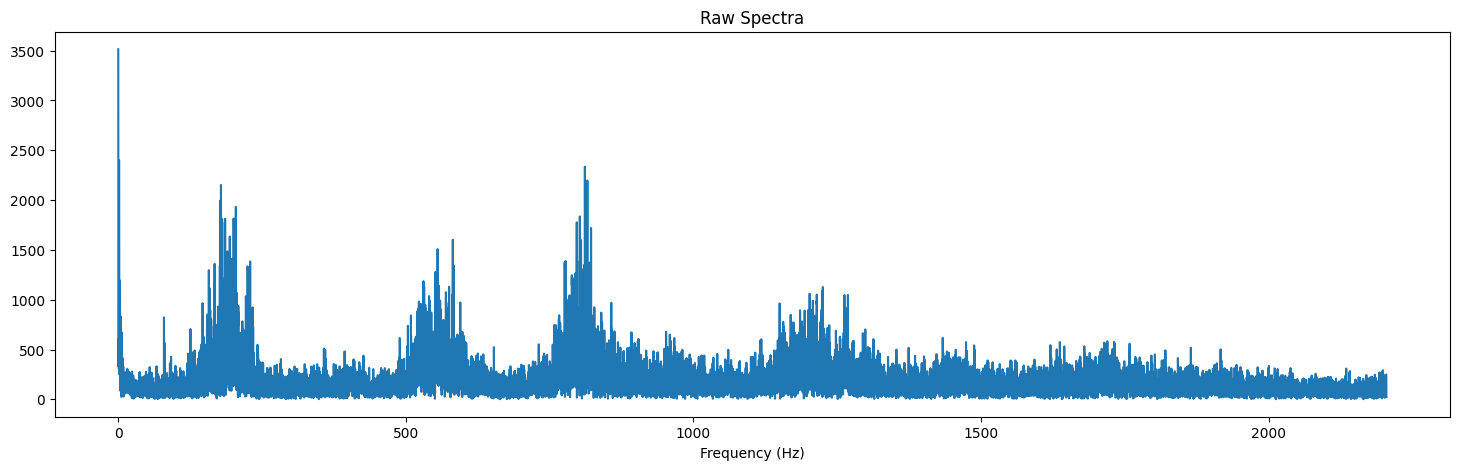

In [20]:
plot_magspec(huff, "Raw Spectra", sr, 0.1)

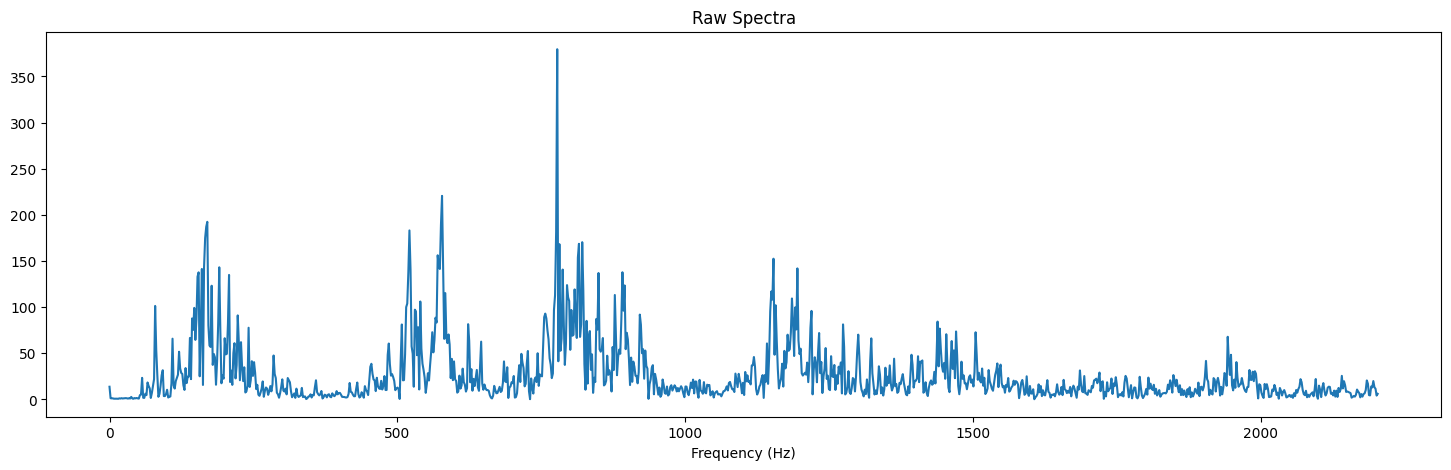

In [34]:
plot_magspec(huff_inst, "Raw Spectra", sr_inst, 0.1)

In [60]:
df = pd.DataFrame(dict(x=mag_spec[:num_frequency_bins]))
CORR_VALS = np.array(mag_spec_inst[:num_frequency_bins])

def get_correlation(vals):
    return pearsonr(vals, CORR_VALS)[0]

In [52]:
mag_spec[:num_frequency_bins].shape

(30644,)

In [53]:
mag_spec_inst[:num_frequency_bins].shape

(11680,)

In [61]:
df['correlation'] = df.rolling(window=len(CORR_VALS)).apply(get_correlation)

In [59]:
df.to_excel("output.xlsx") 